# A) Importing libraries

In [153]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
%matplotlib inline
plt.style.use('fivethirtyeight')

# 1) Loading the Training Dataset

In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')

# B) Data Preprocessing Part 1

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
df.shape

(11504798, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [6]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [9]:
df.nunique()

id                      11504798
Gender                         2
Age                           66
Driving_License                2
Region_Code                   54
Previously_Insured             2
Vehicle_Age                    3
Vehicle_Damage                 2
Annual_Premium             51728
Policy_Sales_Channel         152
Vintage                      290
Response                       2
dtype: int64

-----

# C) Data Preprocessing Part 2

#### i) Removing the id column

In [10]:
df.drop('id',axis=1,inplace=True)

In [11]:
df.shape

(11504798, 11)

### Finding Numerical and categorical values

#### i) For Numerical columns

In [20]:
num_cols=[col for col in df.columns if df[col].nunique()>=5]
num_cols

['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

#### ii) For Categorical columns

In [23]:
cat_cols=[col for col in df.columns if df[col].nunique() <=3]

cat_cols

['Gender',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Response']

### Encoding the Categorical values to the numerical ones

In [26]:
obj_cols=df.select_dtypes(include=['object']).columns

obj_cols

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [29]:
for col in obj_cols:
    results=df[col].value_counts()
    print(results)
    print("----------")

Gender
Male      6228134
Female    5276664
Name: count, dtype: int64
----------
Vehicle_Age
1-2 Year     5982678
< 1 Year     5044145
> 2 Years     477975
Name: count, dtype: int64
----------
Vehicle_Damage
Yes    5783229
No     5721569
Name: count, dtype: int64
----------


In [31]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

In [32]:
for col in obj_cols:
    df[col]=lb.fit_transform(df[col])

#### After Label Encoding the object columns are

In [33]:
for col in obj_cols:
    results=df[col].value_counts()
    print(results)
    print("----------")

Gender
1    6228134
0    5276664
Name: count, dtype: int64
----------
Vehicle_Age
0    5982678
1    5044145
2     477975
Name: count, dtype: int64
----------
Vehicle_Damage
1    5783229
0    5721569
Name: count, dtype: int64
----------


-------

# D) Exploratory Data Analysis

## i) Visualizing the labeled column

<Axes: xlabel='Response', ylabel='count'>

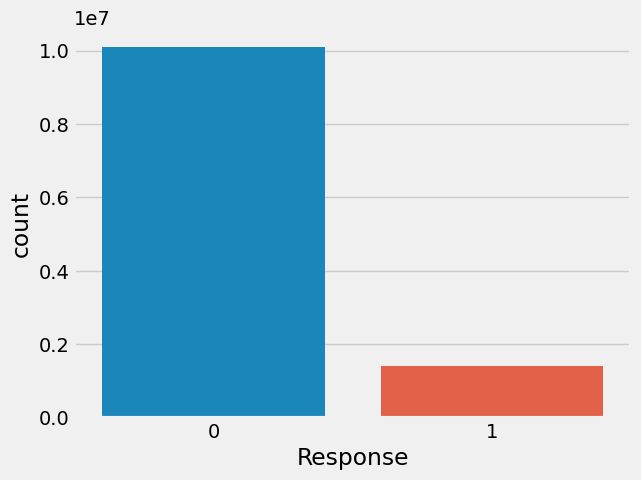

In [36]:
sn.countplot(x='Response', data=df)

## ii) Visualizing the distribution

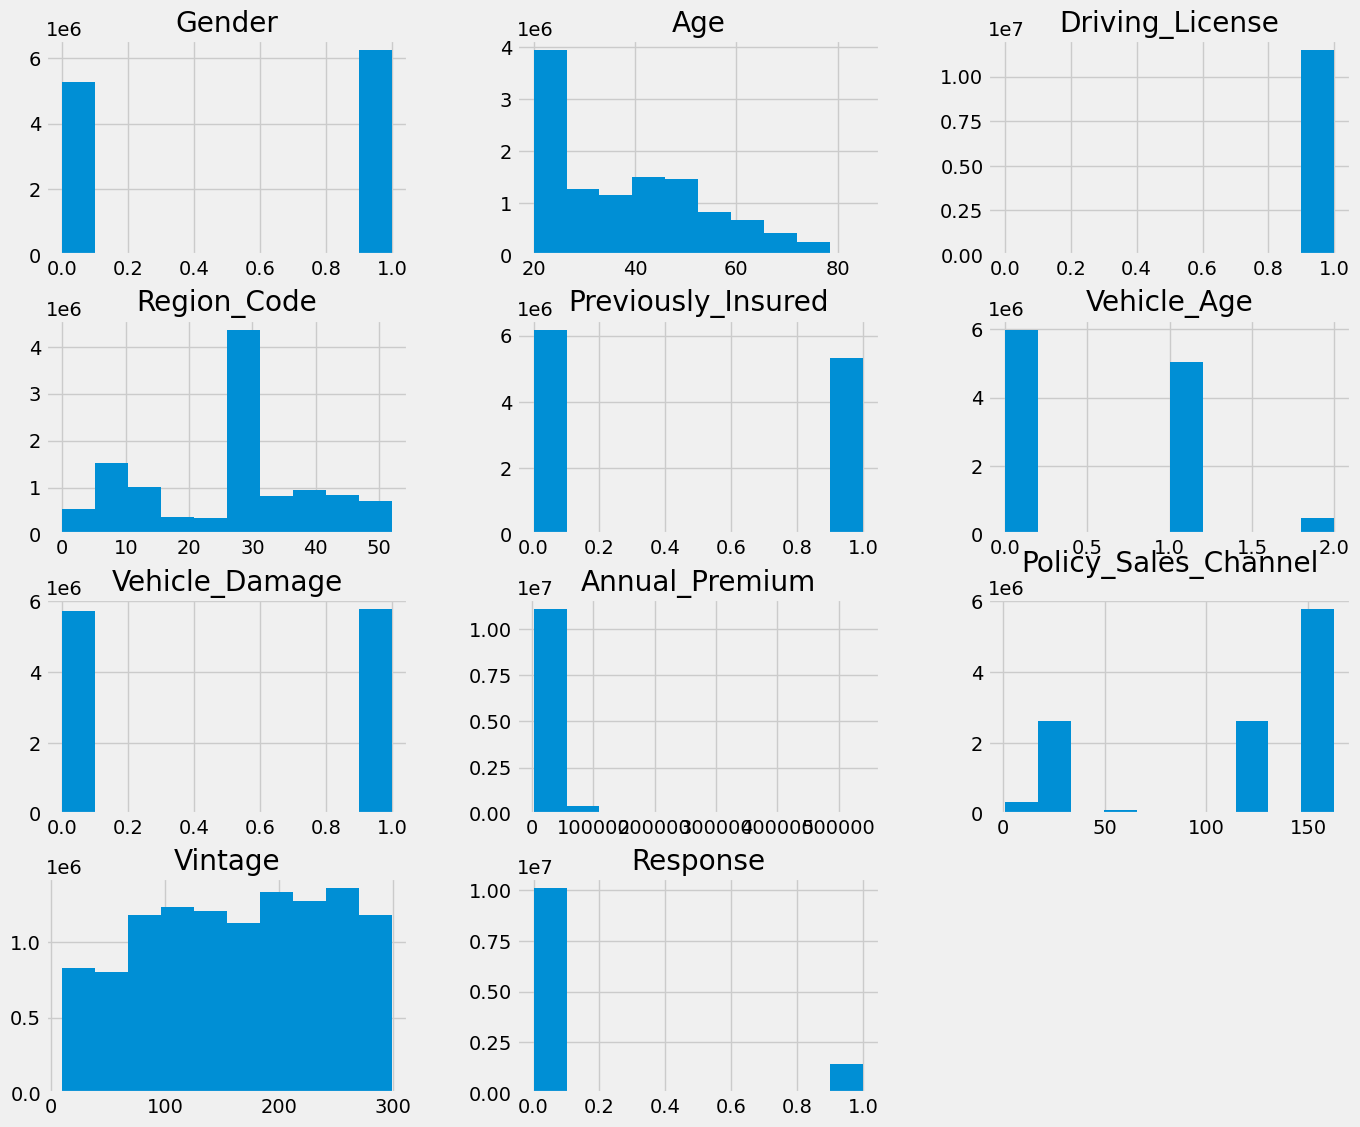

In [41]:
df.hist(figsize=(15,13));

## iii) Visualizing the numerical columns

### Using Distribution Plot and Boxplot

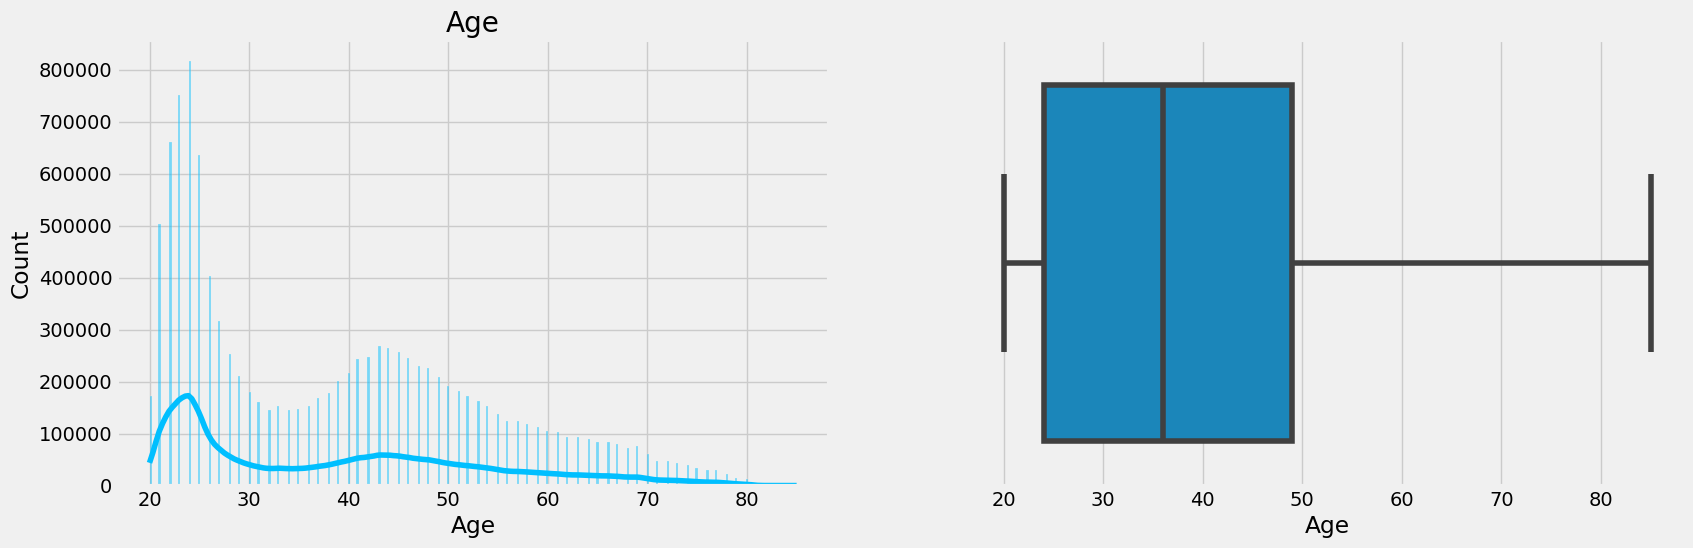

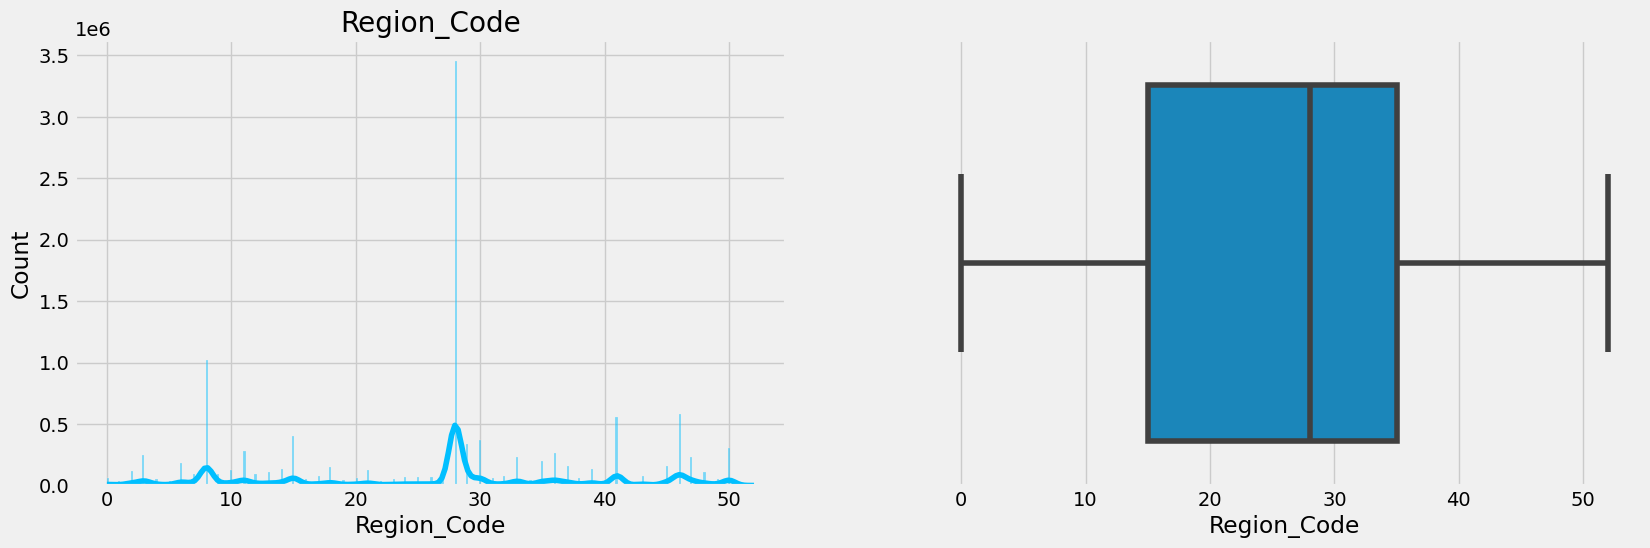

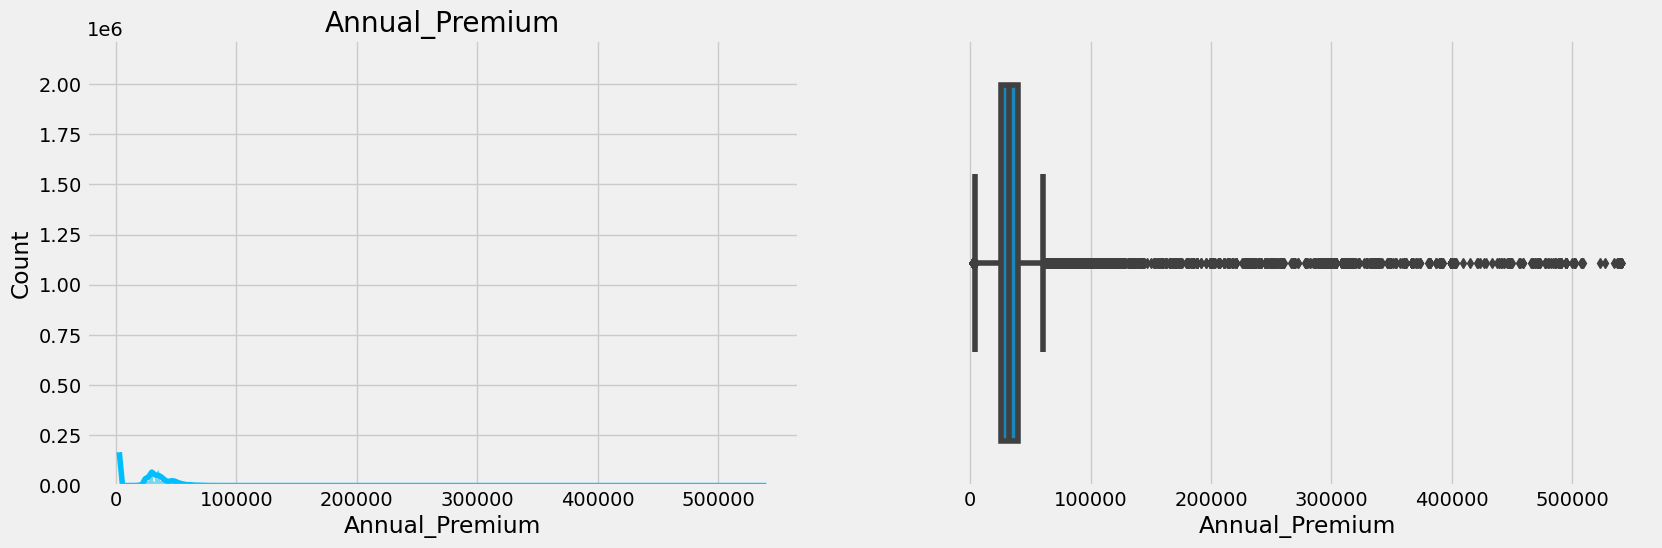

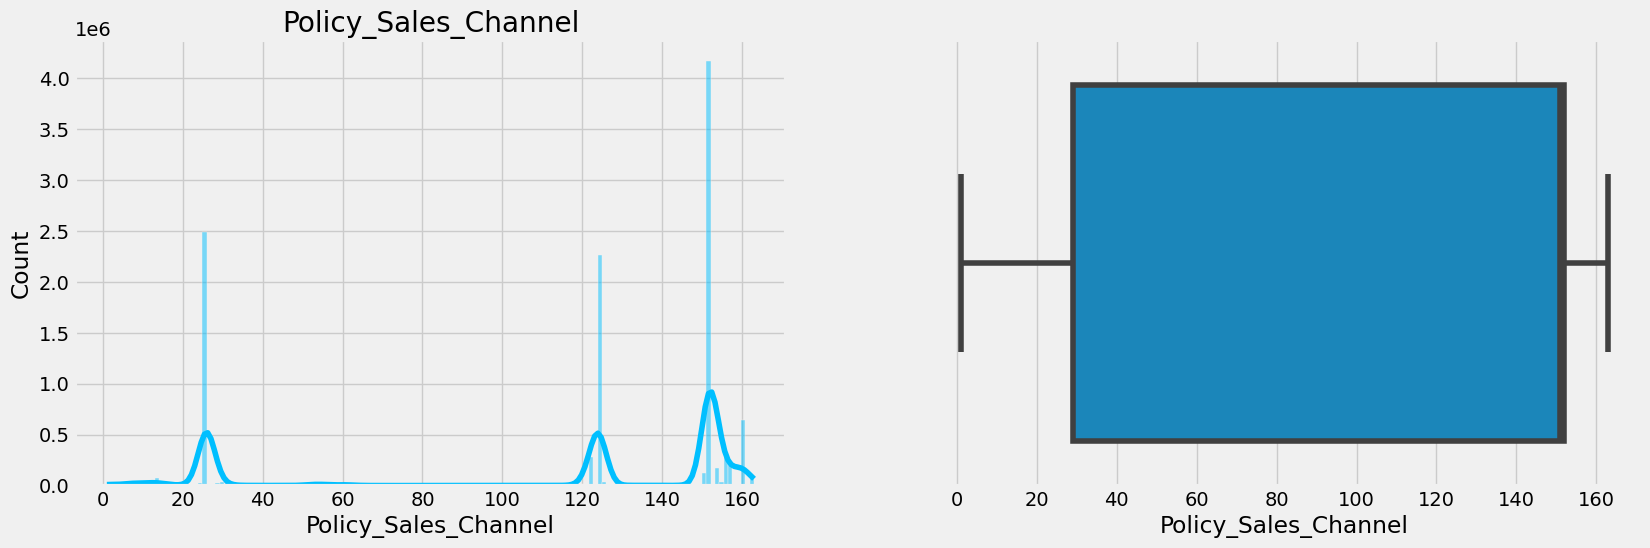

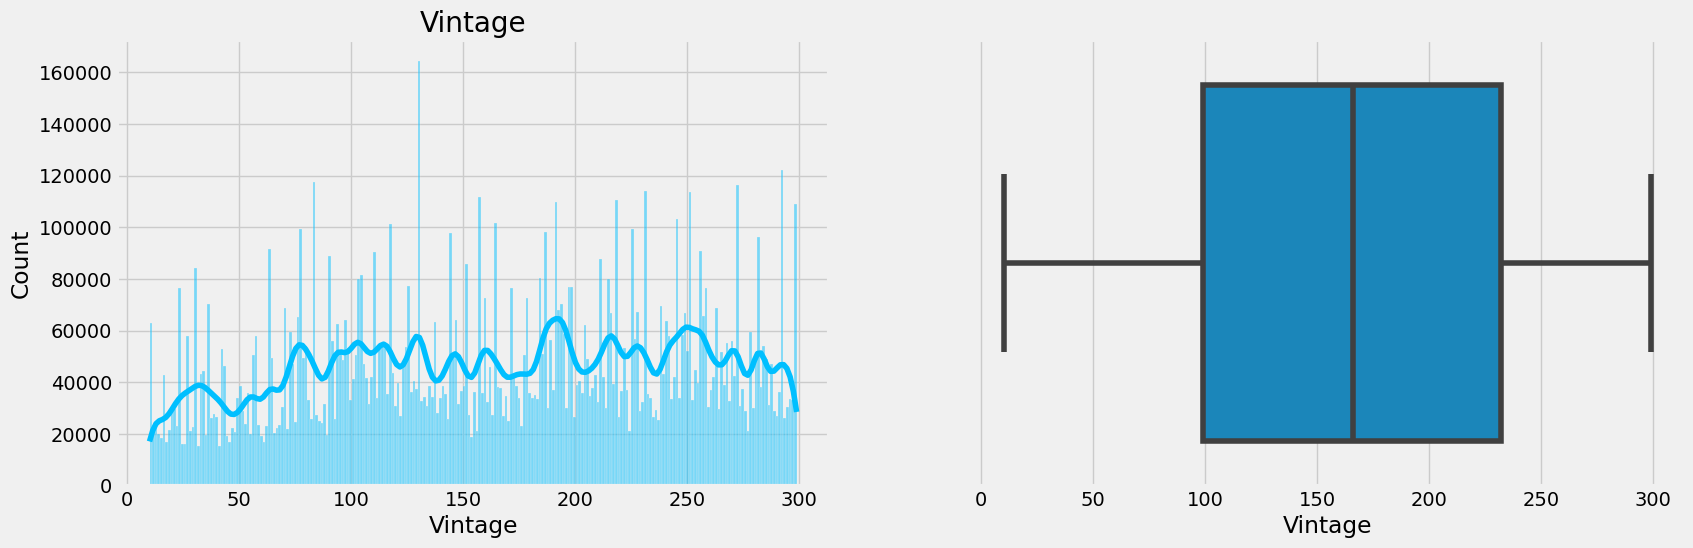

In [43]:
for col in num_cols:
    f,ax=plt.subplots(1,2, figsize=(18,5.5))
    
    # distribution plot
    sn.histplot(x=col, data=df, kde=True, color='deepskyblue',ax=ax[0])
    ax[0].set_title(f'{col}')
    
    # Box plot
    sn.boxplot(x=col, data=df, ax=ax[1])
    
    plt.show()

## iv) Visualizing Categorical columns

### Using Pie Chart and Count Plot

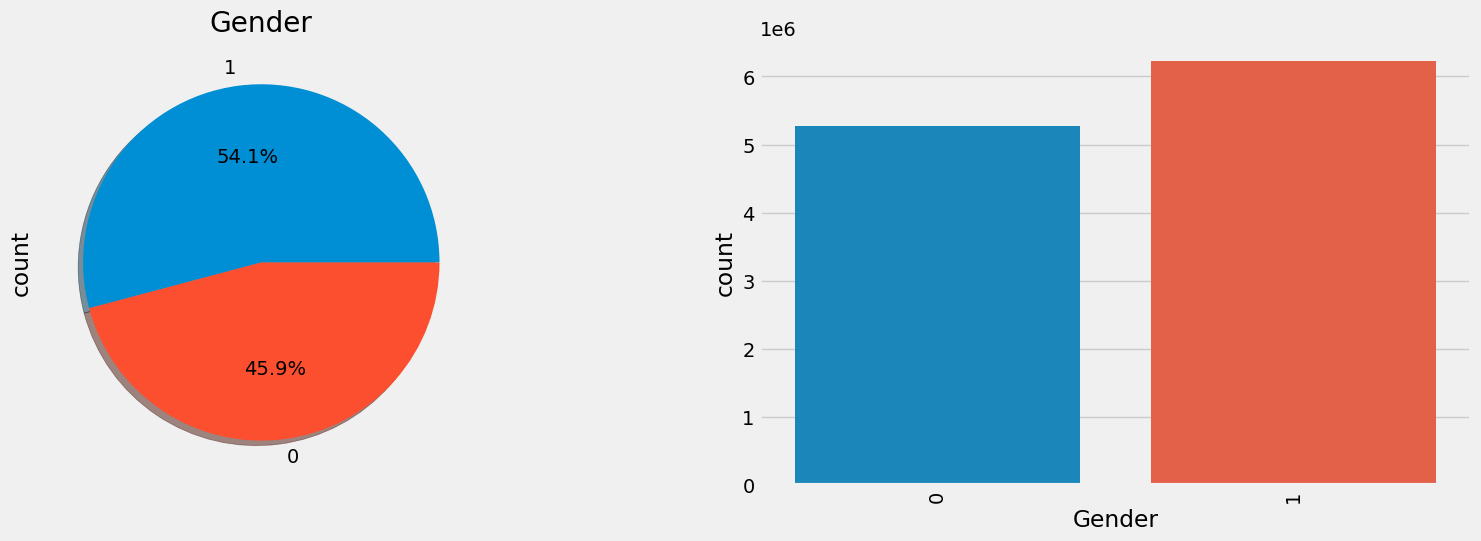

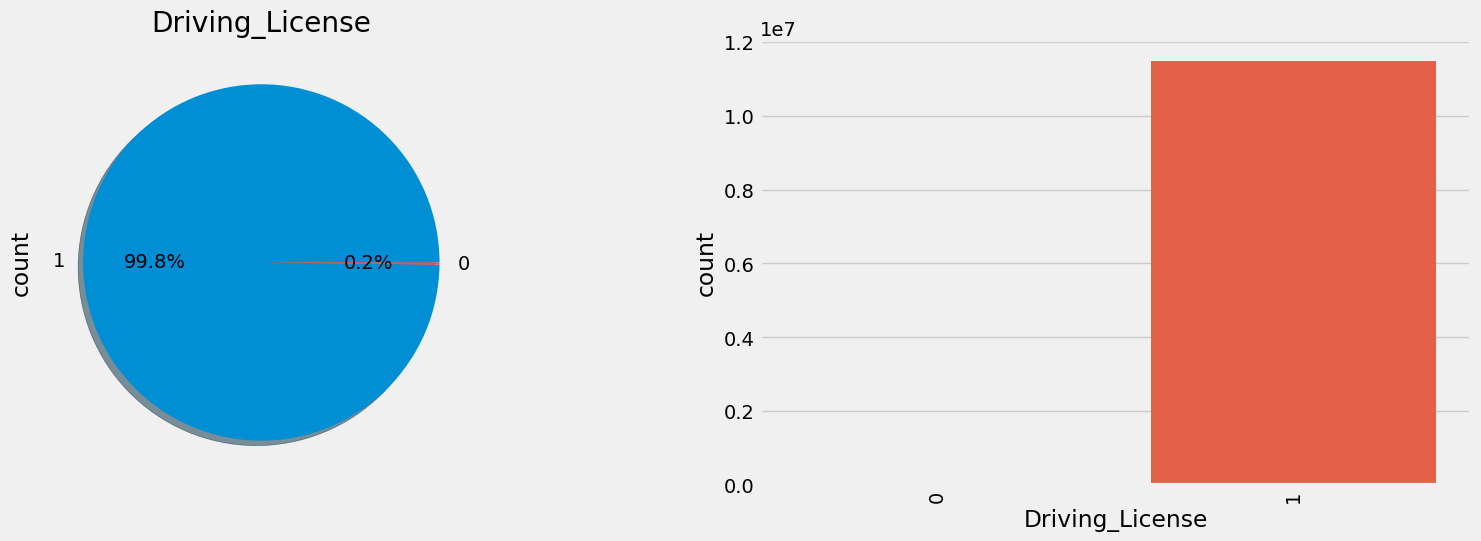

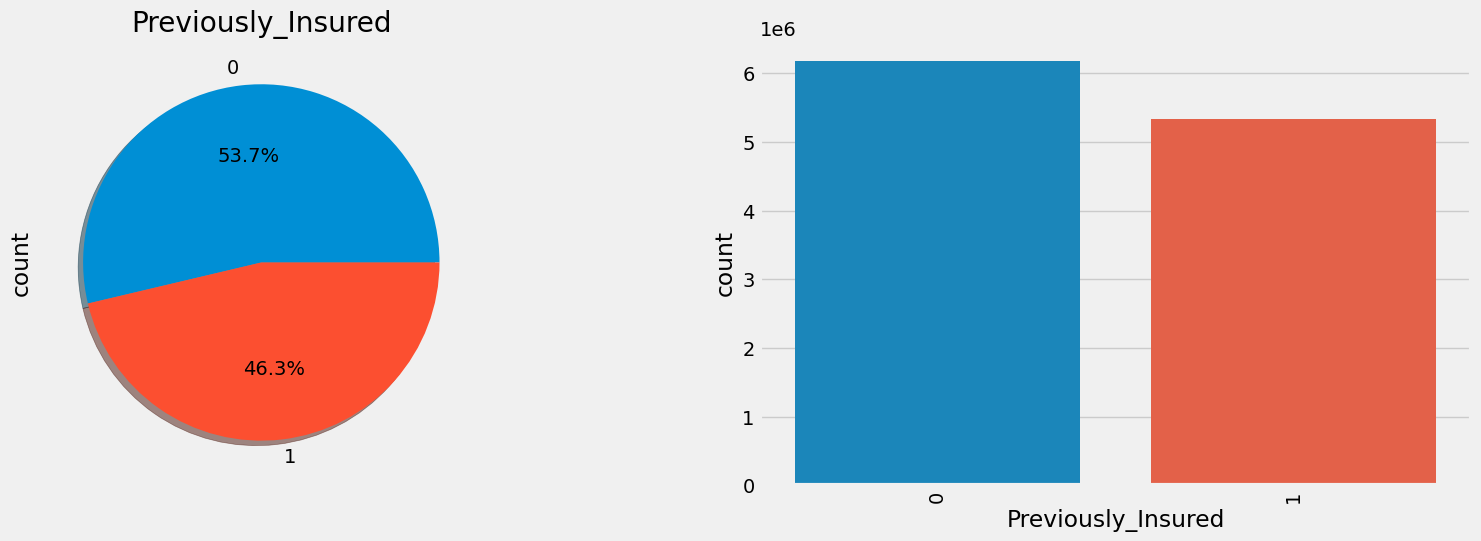

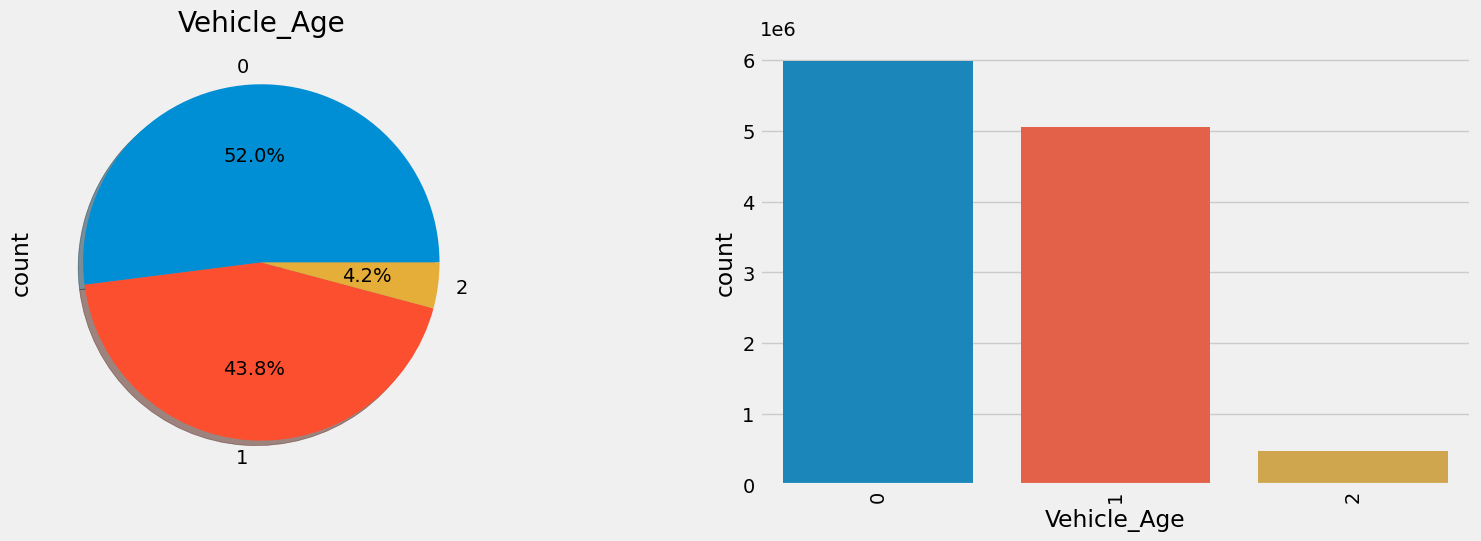

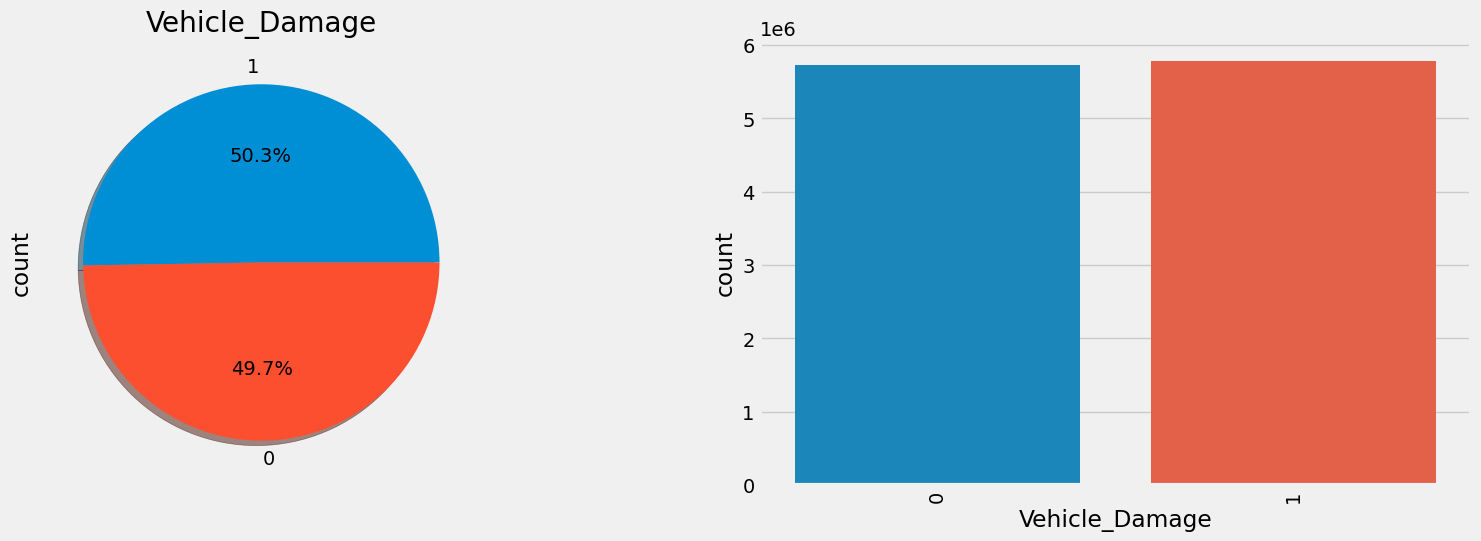

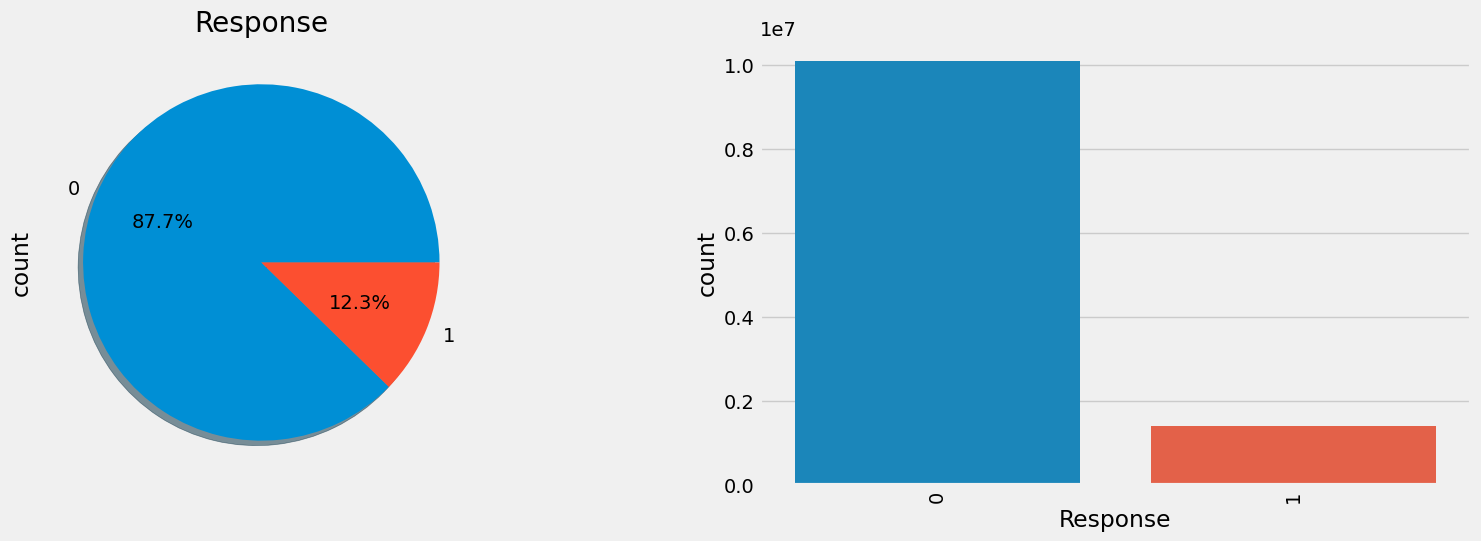

In [45]:
for col in cat_cols:
    f,ax=plt.subplots(1,2, figsize=(18,5.5))
    
    # Pie Chart
    df[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0], shadow=True)
    ax[0].set_title(f'{col}')
    
    # Count Plot
    sn.countplot(x=col, data=df, ax=ax[1])
    plt.xticks(rotation=90)
    
    plt.show()

## v) Visualizing the Co-relation

<Axes: >

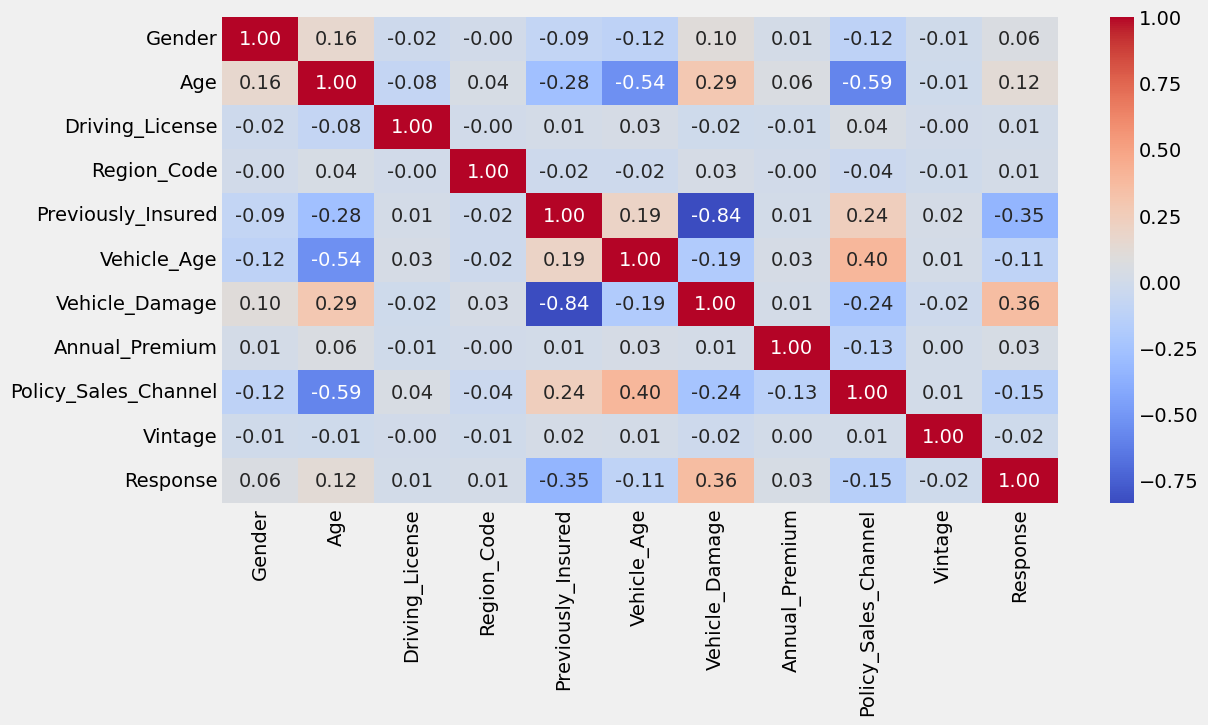

In [55]:
plt.figure(figsize=(12,6))

sn.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

## vi) Visualizing the Co-relation with Respect to labeled column

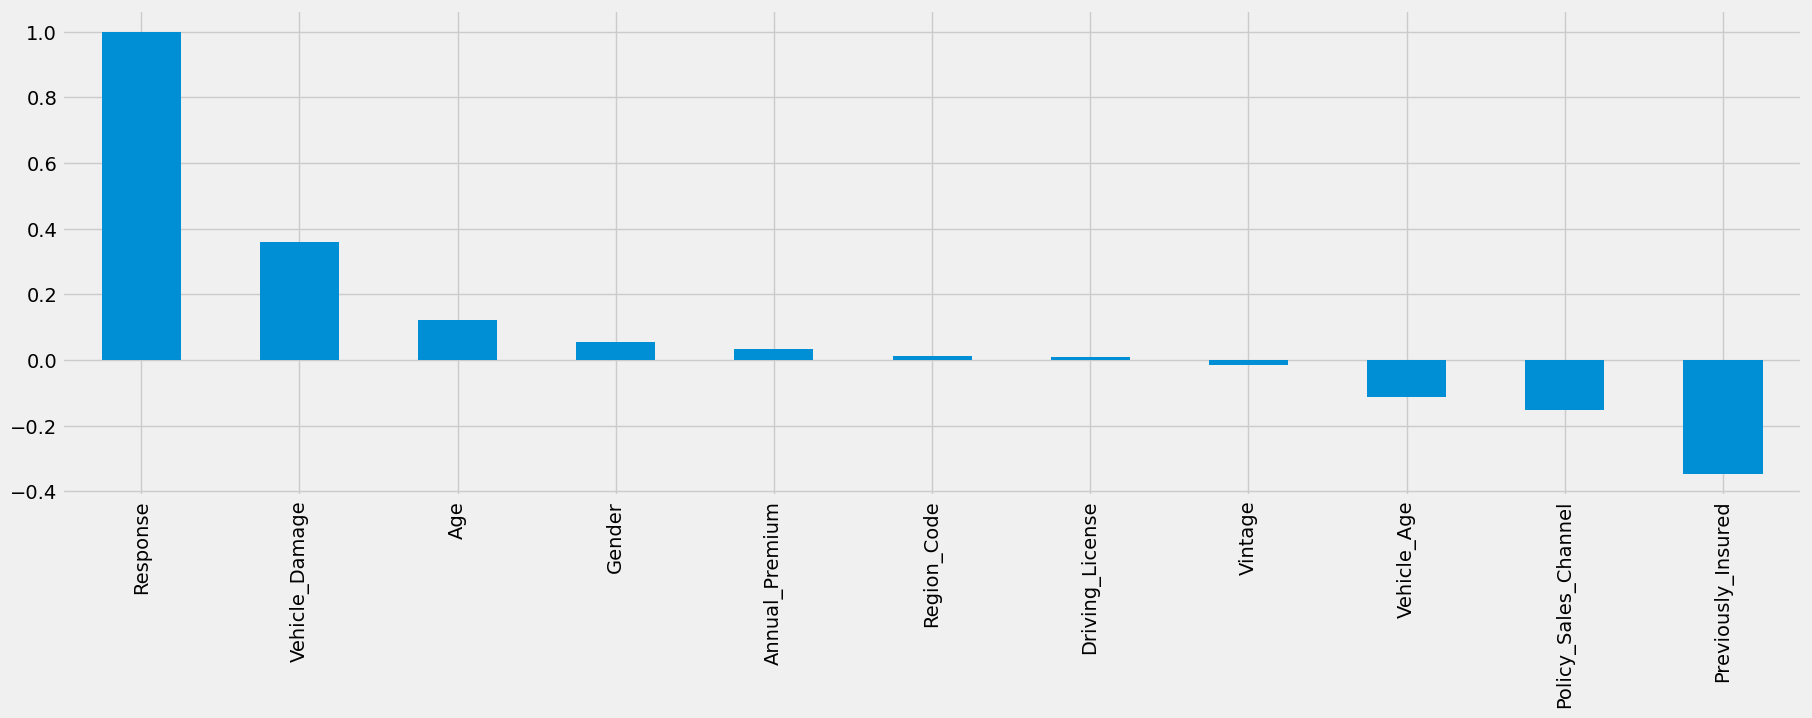

In [57]:
df.corr()['Response'].sort_values(ascending=False).plot(kind='bar', figsize=(20,6))

plt.grid(True)

## vii) Visualizing the outliers

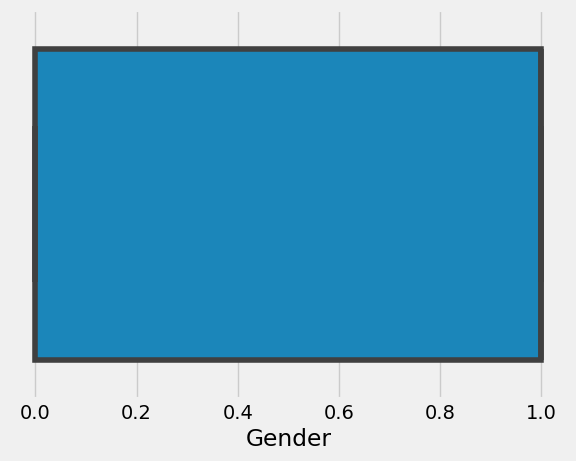

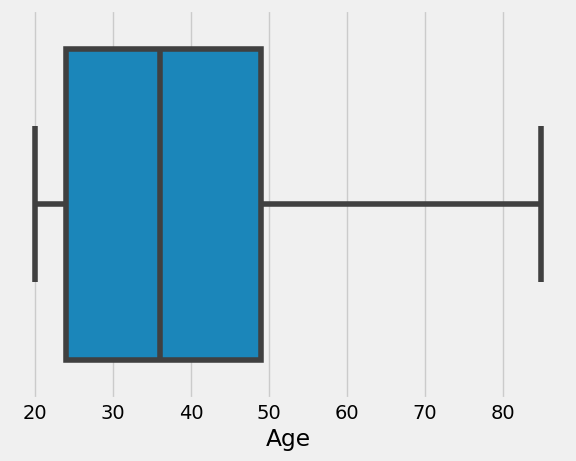

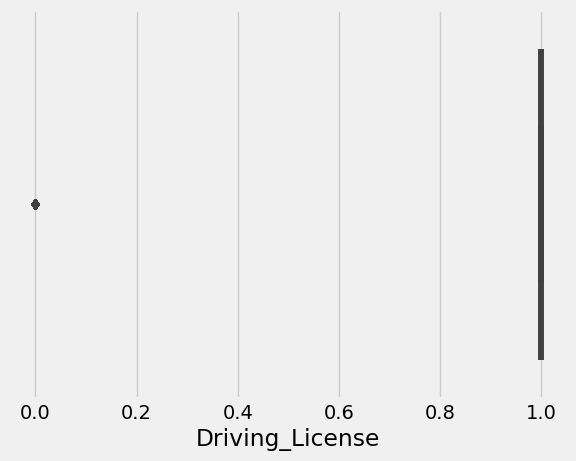

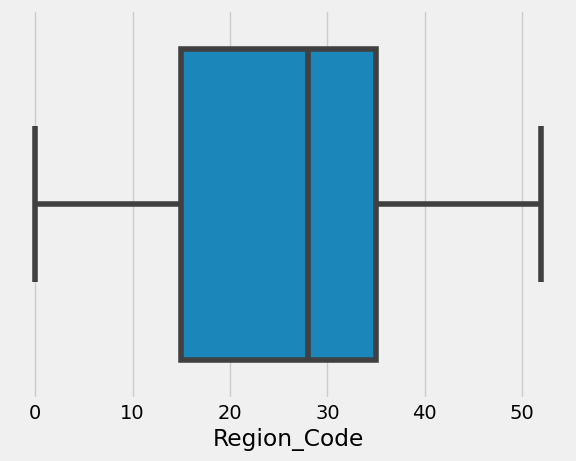

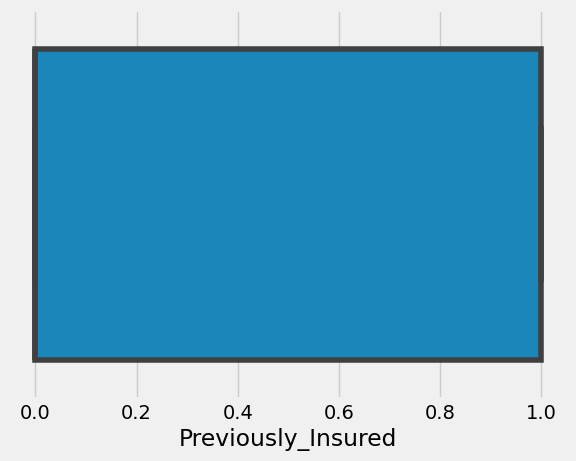

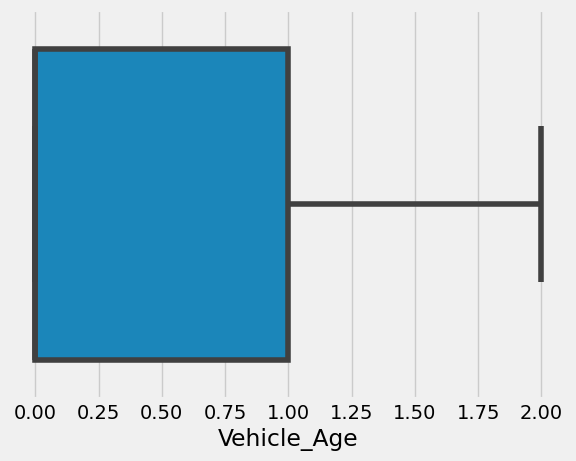

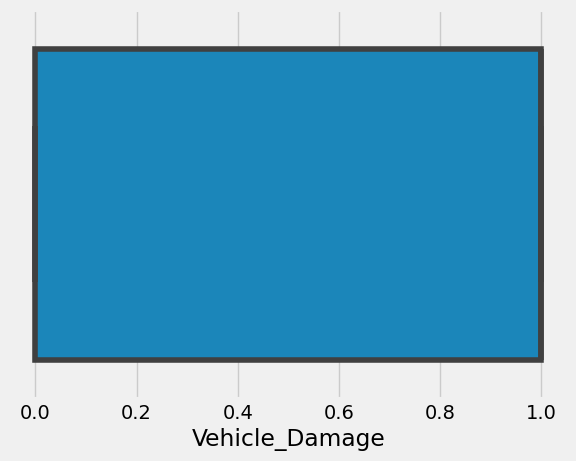

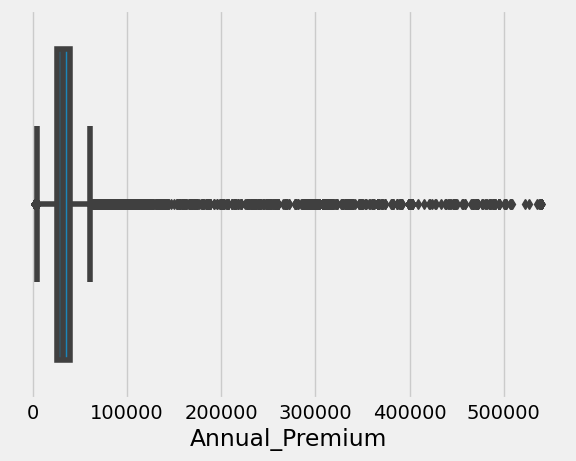

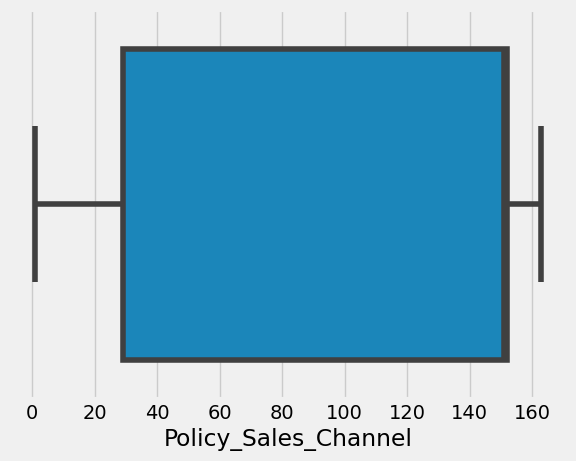

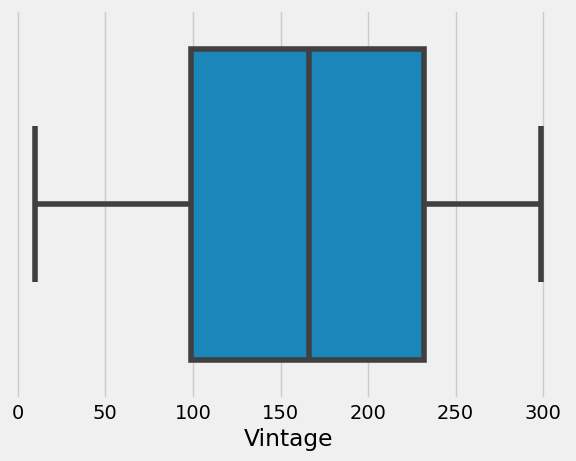

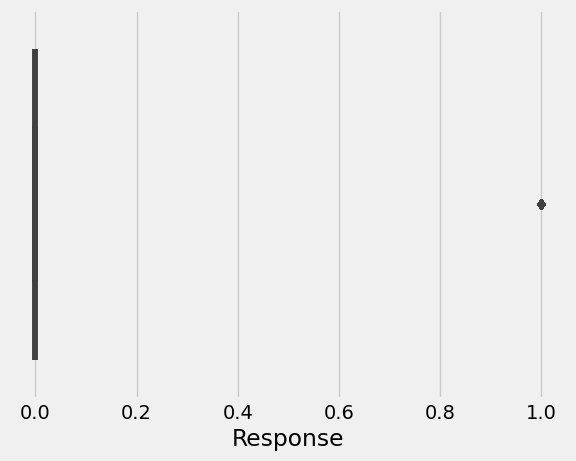

In [60]:
for col in df.columns:
    sn.boxplot(x=col, data=df)
    plt.show()

----------

# E) Train Test Split

In [61]:
X=df.drop('Response', axis=1)
Y=df['Response']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=101)

In [64]:
print(X.shape,X_train.shape,X_test.shape)

(11504798, 10) (9203838, 10) (2300960, 10)


--------

# F) Scaling the data

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [67]:
X_train

array([[ 0.92042114, -0.95934406,  0.04450505, ...,  0.70802598,
         0.73230493, -0.4736565 ],
       [-1.08645918, -0.62583393,  0.04450505, ..., -0.61132321,
         0.73230493,  0.40146325],
       [ 0.92042114,  0.44139847,  0.04450505, ...,  0.83803507,
        -1.59959098,  0.45147009],
       ...,
       [ 0.92042114, -1.15945014,  0.04450505, ..., -0.19669144,
         0.73230493, -0.62367703],
       [ 0.92042114,  0.97501468,  0.04450505, ...,  2.56824942,
         0.21410584,  0.07641877],
       [ 0.92042114,  1.50863088,  0.04450505, ...,  0.29521676,
        -1.59959098, -1.1612506 ]])

-----------

# G) Model Training

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [161]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_auc_score,ConfusionMatrixDisplay

In [70]:
def metrices_info(model):
    y_pred=model.predict(X_test)
    y1_pred=model.predict(X_train)
    
    train_acc=accuracy_score(Y_train, y1_pred)
    test_acc=accuracy_score(Y_test, y_pred)
    report=classification_report(Y_test, y_pred)
    conf=confusion_matrix(Y_test, y_pred)
    
    print("Training Accuracy: ",train_acc)
    print("Testing Accuracy: ",test_acc)
    
    print(' ')
    print("************************************")
    print("Confusion Matrix: ",)
    print(conf)
    
    print(' ')
    print("************************************")
    print("Classification Report")
    print(report)

---------

### i) Logistic Regression

In [71]:
lg=LogisticRegression(max_iter=1000)
lg.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

#### a) Metrices Information

In [72]:
metrices_info(lg)

Training Accuracy:  0.8769413368640343
Testing Accuracy:  0.8772312426117794
 
************************************
Confusion Matrix: 
[[2018466       9]
 [ 282477       8]]
 
************************************
Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93   2018475
           1       0.47      0.00      0.00    282485

    accuracy                           0.88   2300960
   macro avg       0.67      0.50      0.47   2300960
weighted avg       0.83      0.88      0.82   2300960



#### b) ROC Curve

In [77]:
y_pred=lg.predict_proba(X_test)[:,-1]
roc_auc=roc_auc_score(Y_test, y_pred)

roc_auc

0.8245142003600301

--------

### ii) CatBoost Classifier

In [78]:
ct=CatBoostClassifier()
ct.fit(X_train,Y_train)

Learning rate set to 0.5
0:	learn: 0.2974523	total: 1.54s	remaining: 25m 41s
1:	learn: 0.2730973	total: 2.88s	remaining: 23m 59s
2:	learn: 0.2680041	total: 3.9s	remaining: 21m 35s
3:	learn: 0.2660582	total: 4.84s	remaining: 20m 4s
4:	learn: 0.2650898	total: 5.66s	remaining: 18m 45s
5:	learn: 0.2641623	total: 6.62s	remaining: 18m 16s
6:	learn: 0.2635384	total: 7.49s	remaining: 17m 42s
7:	learn: 0.2629007	total: 8.48s	remaining: 17m 31s
8:	learn: 0.2624226	total: 9.37s	remaining: 17m 11s
9:	learn: 0.2621095	total: 10.3s	remaining: 17m
10:	learn: 0.2618442	total: 11.3s	remaining: 16m 52s
11:	learn: 0.2616361	total: 12.1s	remaining: 16m 36s
12:	learn: 0.2614142	total: 12.9s	remaining: 16m 19s
13:	learn: 0.2612432	total: 13.7s	remaining: 16m 3s
14:	learn: 0.2610194	total: 14.6s	remaining: 15m 56s
15:	learn: 0.2606180	total: 15.4s	remaining: 15m 48s
16:	learn: 0.2604286	total: 16.3s	remaining: 15m 43s
17:	learn: 0.2602200	total: 17.3s	remaining: 15m 41s
18:	learn: 0.2600979	total: 18.1s	rema

#### a) Metrices Information

In [79]:
metrices_info(ct)

Training Accuracy:  0.8817207560585052
Testing Accuracy:  0.881120054238231
 
************************************
Confusion Matrix: 
[[1989548   28927]
 [ 244611   37874]]
 
************************************
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94   2018475
           1       0.57      0.13      0.22    282485

    accuracy                           0.88   2300960
   macro avg       0.73      0.56      0.58   2300960
weighted avg       0.85      0.88      0.85   2300960



#### b) ROC Curve

In [80]:
y_pred=ct.predict_proba(X_test)[:,-1]
roc_auc=roc_auc_score(Y_test, y_pred)

roc_auc

0.8807663765421404

#### c) Model Importances

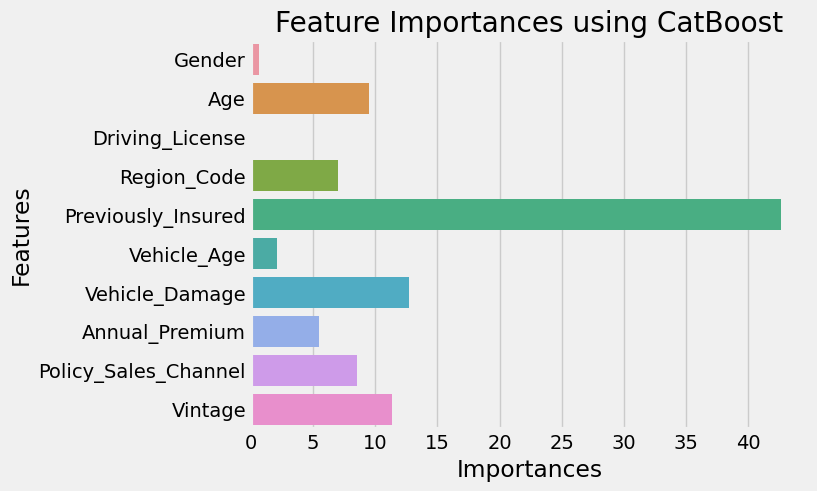

In [159]:
new_col=pd.DataFrame({'col':X.columns, 'Importances':ct.feature_importances_})

sn.barplot(y='col',x='Importances', data=new_col)

plt.title("Feature Importances using CatBoost")

plt.ylabel('Features')
plt.show()

--------

### iii) Light Gradient Boosting Machine

In [81]:
lg=LGBMClassifier()
lg.fit(X_train,Y_train)

[LightGBM] [Info] Number of positive: 1132574, number of negative: 8071264
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.212708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 9203838, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.123055 -> initscore=-1.963817
[LightGBM] [Info] Start training from score -1.963817


LGBMClassifier()

#### a) Metrices Information

In [82]:
metrices_info(lg)

Training Accuracy:  0.8795754553698142
Testing Accuracy:  0.879727591961616
 
************************************
Confusion Matrix: 
[[2004835   13640]
 [ 263102   19383]]
 
************************************
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.94   2018475
           1       0.59      0.07      0.12    282485

    accuracy                           0.88   2300960
   macro avg       0.74      0.53      0.53   2300960
weighted avg       0.85      0.88      0.84   2300960



#### b) ROC Curve

In [83]:
y_pred=lg.predict_proba(X_test)[:,-1]
roc_auc=roc_auc_score(Y_test, y_pred)

roc_auc

0.8757416438064307

#### c) Model Importances

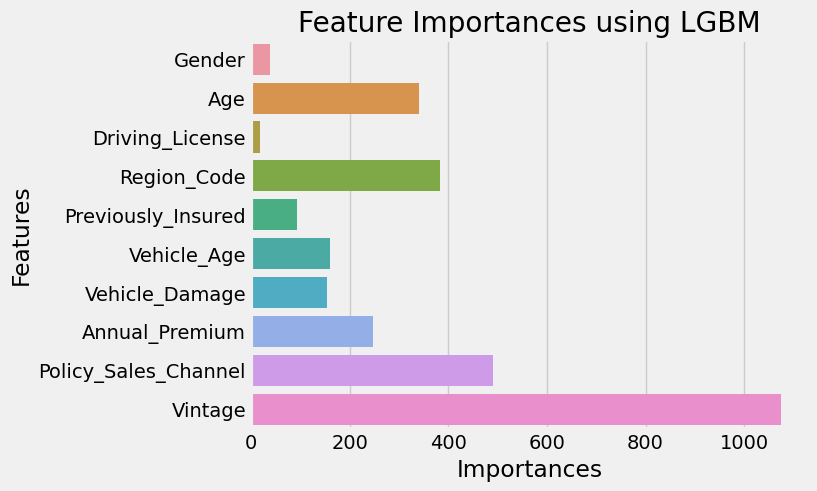

In [160]:
new_col=pd.DataFrame({'col':X.columns, 'Importances':lg.feature_importances_})

sn.barplot(y='col',x='Importances', data=new_col)

plt.title("Feature Importances using LGBM")

plt.ylabel('Features')
plt.show()

-------------

# 2) Test Set 

In [84]:
test=pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')

In [85]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [86]:
test.shape

(7669866, 11)

In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 643.7+ MB


In [88]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [89]:
test.duplicated().sum()

0

### Removing id column

In [90]:
t_copy=test.copy()

In [92]:
test.drop('id', axis=1, inplace=True)

In [93]:
test.shape

(7669866, 10)

### Label Encoding

In [95]:
c_col=test.select_dtypes(include=['object']).columns

c_col

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [102]:
for col in c_col:
    test[col]=lb.fit_transform(test[col])

In [103]:
for col in c_col:
    results=test[col].value_counts()
    print(results)
    print("*************")

Gender
1    4151402
0    3518464
Name: count, dtype: int64
*************
Vehicle_Age
0    3989276
1    3361255
2     319335
Name: count, dtype: int64
*************
Vehicle_Damage
1    3854463
0    3815403
Name: count, dtype: int64
*************


### Scaling the dataset

In [104]:
test=sc.transform(test)

----------

# 3) Kaggle Submission

In [114]:
ct_pred=ct.predict_proba(test)[:,1]

In [115]:
submission=pd.DataFrame({'id':t_copy['id'], 'Response':ct_pred})

In [116]:
submission

,id,Response
0,11504798,0.004373
1,11504799,0.455947
2,11504800,0.217062
3,11504801,0.000038
4,11504802,0.061990
...,...,...
7669861,19174659,0.232333
7669862,19174660,0.000058
7669863,19174661,0.000183
7669864,19174662,0.527962


# H) Submitting the csv file

In [117]:
submission.to_csv('submission2.csv',index=False)

-----------

# I) Saving the Model

In [118]:
import pickle

In [119]:
pickle.dump(lg, open('LogisticRegression.pkl', 'wb'))
pickle.dump(lb, open('labelEncoder.pkl', 'wb'))
pickle.dump(sc, open('Scaler.pkl', 'wb'))

----

# 4) Prediction

#### Prediction Function

In [152]:
def prediction_results(Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,
        sc,lg):
    
    features=np.array([[Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage]])
    scaled_features=sc.transform(features)
    result=ct.predict(scaled_features)
    
    return result

### Test Case

In [151]:
Gender=0
Age=43
Driving_License=1
Region_Code=28.0
Previously_Insured=0
Vehicle_Age=0
Vehicle_Damage=1
Annual_Premium=55837.0
Policy_Sales_Channel=26.0
Vintage=120


result=prediction_results(Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,sc,lg)

print(result)

if result==0:
    print("No Insurence Offer")
else:
    print("Insurence Offer")

[0]
No Insurence Offer


------------